# Kernel Bandwidth Example
Spring 2019 AME-70790 Final Project

Nicholas Geneva (ngeneva@nd.edu)

Reference: Wand, M. P., & Jones, M. C. (1994). Kernel smoothing. Chapman and Hall/CRC.
___
For this first example we will illustrate the concept of *kernel bandwidth*. We will start with the formula for a kernel density estimator (KDE):
$$f(x,h)=(nh)^{-1}\sum_{i=1}^{n}K\left((x-x_{i})/h\right),$$
where $K$ is a function whose density is equal to one ($\int K(x)dx = 1$) which is the *kernel*. The variable $h$ is a positive number which is referred to as the *bandwidth*. The bandwidth plays an important role on the output of the kernel smoother as it influences the range of influence the kernel has. To illustrate this let us consider approximating the density:
    $$f_{1}(x)=\frac{3}{4}\phi\left(x | 0,1\right) + \frac{1}{4}\phi\left(x | 3/2, 1/3\right),$$
where $\phi(x)$ is the normal PDF making this a mixture of two Gaussians. We will use 1000 training data points to approximate this density function with the kernel density estimator.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
plt.close("all")
np.random.seed(123)
ntrain = 1000
band_widths = [0.06, 0.45, 0.15]

# Target data
x_test = np.linspace(-3,3,200)
y_test = 0.75*norm.pdf(x_test, loc=0, scale=1) + 0.75*norm.pdf(x_test, loc=3/2, scale=1/3)
# Training data
c1 = np.sum(np.random.rand(ntrain) < 0.75)
c2 = ntrain - c1
x_train0 = np.concatenate([np.random.randn(c1), (1/3.)*np.random.randn(c1)+1.5], axis=0)

For our kernel we will use a standard normal kernel, which is analogous to the radial basis function kernel. We can make our notation a little more compact by defining the KDE as:
    $$f(x,h)=n^{-1}\sum_{i=1}^{n}K_{h}(x-x_{i}), \quad K_{h}=\mathcal{N}(0,h^{2}).$$

In [3]:
x_pred0 = np.linspace(-3, 3, 200)
# Expand array dims and repeat
x_pred = np.expand_dims(x_pred0, axis=1).repeat(x_train0.shape[0], axis=1)
x_train = np.expand_dims(x_train0, axis=0).repeat(x_pred0.shape[0], axis=0)

y_pred = []
for h in band_widths:
    # Compute kernel
    y_pred0 = (1/ntrain)*np.sum(norm.pdf(x_pred-x_train, scale=h), axis=1)
    y_pred.append(y_pred0)

With the densities approximated with our kernel density estimator all what is left is to plot results.

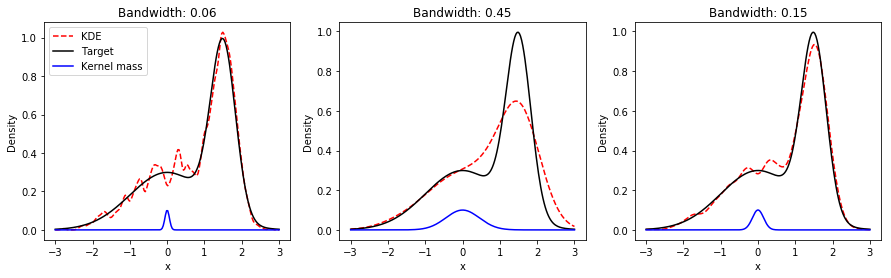

In [4]:
fig = plt.figure(figsize=(15,4))
ax = []
ax.append(plt.subplot2grid((1, 3), (0, 0)))
ax.append(plt.subplot2grid((1, 3), (0, 1)))
ax.append(plt.subplot2grid((1, 3), (0, 2)))

for i, h in enumerate(band_widths):
    # Kernel prediction
    ax[i].plot(x_pred0, y_pred[i], '--', c='r', label='KDE')
    # Target 
    ax[i].plot(x_test, y_test, c='k', label='Target')
    ax[i].set_title('Bandwidth: {:.02f}'.format(h))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Density')
    # Kernel Mass
    mass = norm.pdf(x_test, scale=h)
    ax[i].plot(x_test, 0.1*mass/np.max(mass), c='b', label='Kernel mass')
    
ax[0].legend(loc=2)    
plt.show()

Here we can see the influence the bandwidth has on the predicted density. The black line is the target density, the red dashed line is the density approximated with the kernel smoother and the blue line illustrates the scaled kernel mass.

On the left, a bandwidth that is too small will result in a prediction that is overly noisy. In the middle, a bandwidth that is too large will over smooth the prediction. And finally on the right, a properly calibrated bandwidth will smooth the prediction yet maintain predictive accuracy.